# LAB Sheet-05: Fitting a Probability Distribution to Data with the Maximum Likelihood Method

### Submitted by : Vatsalya Gupta, SC19B098, B.Tech. ECE VII Semester

## Maximum Likelihood Estimation

One solution to probability density estimation is referred to as Maximum Likelihood Estimation,
or MLE for short. Maximum Likelihood Estimation involves treating the problem as an
optimization or search problem, where we seek a set of parameters that results in the best fit for
the joint probability of the data sample $(X)$. First, it involves defining a parameter called theta
$(\theta)$ that defines both the choice of the probability density function and the parameters of that
distribution. It may be a vector of numerical values whose values change smoothly and map to
different probability distributions and their parameters. In Maximum Likelihood Estimation, we
wish to maximize the probability of observing the data from the joint probability distribution
given a specific probability distribution and its parameters, stated formally as: $$P(X \mid \theta)$$

This conditional probability is often stated using the semicolon (;) notation instead of the
bar notation (|) because $\theta$ is not a random variable, but instead an unknown parameter. For
example:$$P(X; \theta)$$
Or: $$P(x_{1}, x_{2}, x_{3}, · · · , x_{n};\theta)$$
This resulting conditional probability is referred to as the likelihood of observing the data
given the model parameters and written using the notation $L()$ to denote the likelihood function.
For example:$$L(X; \theta)$$
The objective of Maximum Likelihood Estimation is to find the set of parameters $(\theta)$ that
maximize the likelihood function, e.g. result in the largest likelihood value.
$$max L(X; \theta)$$
We can unpack the conditional probability calculated by the likelihood function. Given that
the sample is comprised of $n$ examples, we can frame this as the joint probability of the observed
data samples $x_{1}, x_{2}, x_{3}, · · · , x_{n}$ in $X$ given the probability distribution parameters $(\theta)$.
$$L(x_{1}, x_{2}, x_{3}, · · · , x_{n}; \theta)$$
The joint probability distribution can be restated as the multiplication of the conditional
probability for observing each example given the distribution parameters.
$$\prod_{i = 1}^{n} P(x_{i}; \theta)$$

Multiplying many small probabilities together can be numerically unstable in practice,
therefore, it is common to restate this problem as the sum of the log conditional probabilities of
observing each example given the model parameters.
$$\sum_{i = 1}^{n} \log_{e} P(x_{i}; \theta)$$


A good way to explain a dataset is to apply a probabilistic model to it. Finding an adequate model can be a job in its own. Once a model is chosen, it is necessary to compare it to the data. This is what statistical estimation is about. In this recipe, we apply the maximum likelihood method on a dataset of survival times after heart transplant (1967-1974 study).


### Getting ready
As usual in this chapter, a background in probability theory and real analysis is recommended. In addition, you need the statsmodels package to retrieve the test dataset. It should be included in Anaconda, but you can always install it with the $\texttt{conda install statsmodels}$ command.

### How to do it...
1.  statsmodels is a Python package for conducting statistical data analyses. It also contains real-world datasets that we can use when experimenting with new methods.

In [1]:
import numpy as np
import scipy.stats as st
import statsmodels.datasets
import matplotlib.pyplot as plt
%matplotlib inline

2. Let's take a look at ths DataFrame. Here, we use the heart dataset. Load $\texttt{statsmodels.datasets.heart.load_pandas()}$ data to a variable $\texttt{data}$ and display the last 5 rows.

In [2]:
# Your code solution here
data = statsmodels.datasets.heart.load_pandas().data
data.tail()

,survival,censors,age
64,14.0,1.0,40.3
65,167.0,0.0,26.7
66,110.0,0.0,23.7
67,13.0,0.0,28.9
68,1.0,0.0,35.2


This dataset contains censored and uncensored data: a censor of 0 means that the patient was alive at the end of the study, and thus we don't know the exact survival time. We only know that the patient survived at least the indicated number of days. For simplicity here, we only keep uncensored data (we thereby introduce a bias toward patients that did not survive very long after their transplant). Perform this data mainipulation. Now again display the last 5 rows.

In [3]:
# Your code solution here
data = data[data.censors == 1]
survival = data.survival
data.tail()

,survival,censors,age
57,50.0,1.0,46.4
59,68.0,1.0,51.4
60,26.0,1.0,52.5
63,161.0,1.0,43.8
64,14.0,1.0,40.3


3.  Let's take a look at the data graphically, by plotting the raw survival data and the histogram:

Text(0, 0.5, 'Total number of patients')

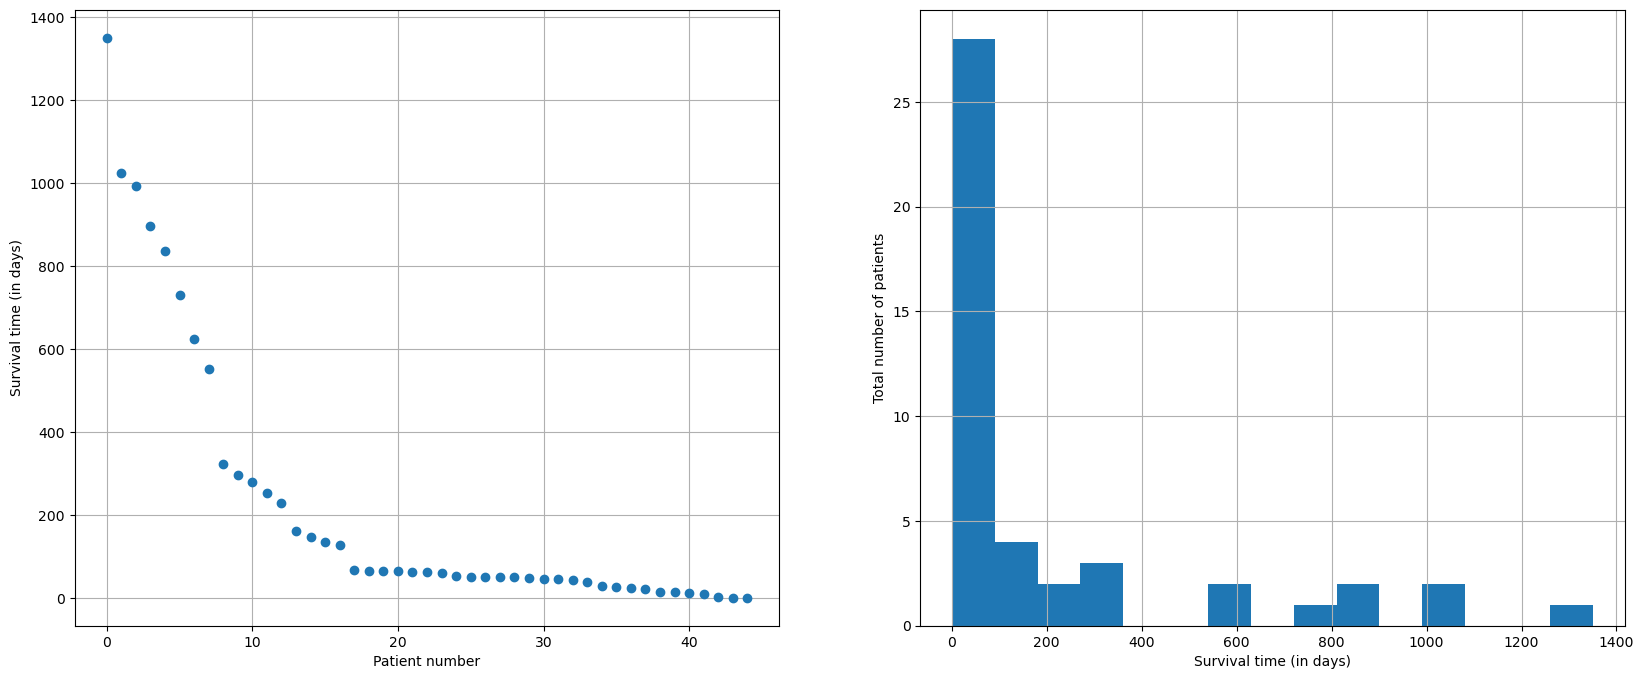

In [4]:
#Your code solution here
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

ax1.grid(True)
ax1.plot(sorted(survival)[::-1], 'o')
ax1.set_xlabel('Patient number')
ax1.set_ylabel('Survival time (in days)')
ax2.grid(True)
ax2.hist(survival, bins=15)
ax2.set_xlabel('Survival time (in days)')
ax2.set_ylabel('Total number of patients')

4.  We observe that the histogram is decreasing very rapidly. Fortunately, the survival rates today are much higher (~70 percent after 5 years). Let's try to fit an exponential distribution (more information on the exponential distribution is available at https://en.wikipedia.org/wiki/Exponential_distribution) to the data. According to this model, $S$ (number of days of survival) is an exponential random variable with the parameter $\lambda$, and the observations $s_{i}$ are sampled from this distribution. Let the sample mean be:
$$\large \overline s = \frac{1}{n}\sum_{i = 1}^{n}s_{i}$$
The likelihood function of an exponential distribution is as follows, by definition:
$$\large \mathcal{L}(\lambda, \{s_{i}\}) = P({s_{i}}\mid \lambda) = \lambda^{n}\exp(\lambda n \overline s)$$ 
(Prove by yourself)

The maximum likelihood estimate for the rate parameter is, by definition, the value $\lambda$ that maximizes the likelihood function. In other words, it is the parameter that maximizes the probability of observing the data, assuming that the observations are sampled from an exponential distribution.

Here, it can be shown that the likelihood function has a maximum value when $\lambda =1/\overline s$, which is the maximum likelihood estimate for the rate parameter. Compute this parameter numerically
(use 'rate' to store the estimate $\lambda$).

In [5]:
# Your code solution here
sample_mean = survival.mean()
rate = 1.0/sample_mean

5.  To compare the fitted exponential distribution to the data, we first need to generate linearly spaced values for the x-axis. Generate 1000 linearly spaced values from $0$ to maximum value of 'survival' in the dataset for storing the days of survival (Use variable 'days')

In [6]:
# Your code solution here
sample_max = survival.max()
days = np.linspace(0.0, sample_max, 1000)

We can obtain the probability density function of the exponential distribution with $\texttt{SciPy}$. The parameter is the scale, the inverse of the estimated rate. Compute the probability density function and store it in variable 'dist_exp'.

In [7]:
# Your code solution here
dist_exp = st.expon.pdf(days, scale=1.0/rate)

6.  Now, let's plot the histogram and the obtained distribution. We need to rescale the theoretical distribution to the histogram (depending on the bin size and the total number of data points):

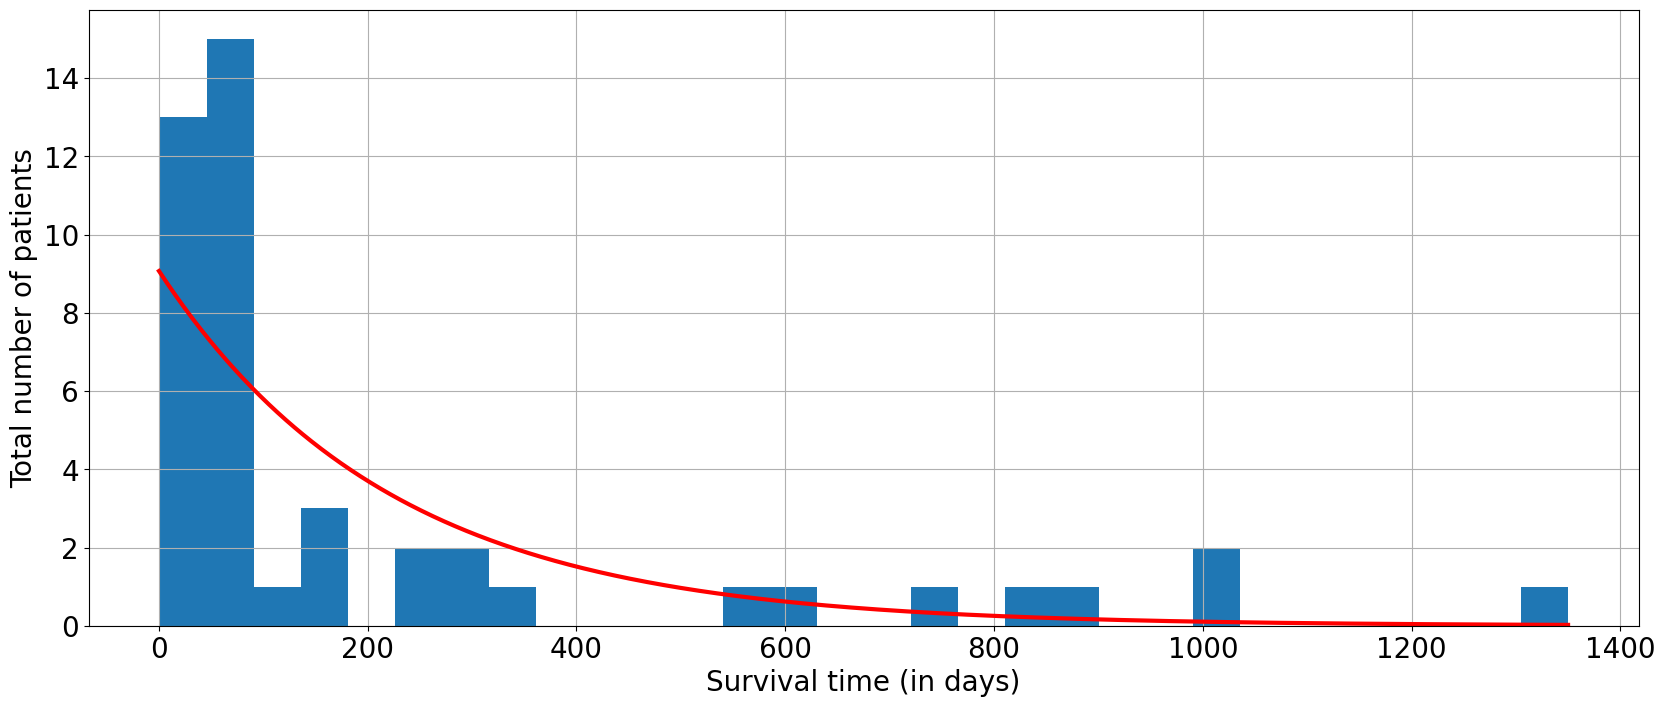

In [8]:
nbins = 30
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
ax.grid(True)
ax.hist(survival, nbins)
ax.plot(days, dist_exp * len(survival) * sample_max / nbins, '-r', lw=3)
ax.set_xlabel("Survival time (in days)", fontsize = 20)
ax.set_ylabel("Total number of patients", fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

The fit is far from perfect. We were able to find an analytical formula for the maximum likelihood estimate here. In more complex situations, that is not always possible. Thus we may need to resort to numerical methods. $\texttt{SciPy}$ actually integrates numerical maximum likelihood routines for a large number of distributions. Here, we use this other method to estimate the parameter of the exponential distribution.

In [9]:
dist = st.expon
args = dist.fit(survival)
args

(1.0, 222.2888888888889)

7.  We can use these parameters to perform a Kolmogorov-Smirnov test, which assesses the goodness of fit of the distribution with respect to the data. This test is based on a distance between the empirical distribution function of the data and the cumulative distribution function (CDF) of the reference distribution.

In [10]:
st.kstest(survival, dist.cdf, args)

KstestResult(statistic=0.36199693810792966, pvalue=8.647045785208746e-06)

Here, the p-value is very low: the null hypothesis (stating that the observed data stems from an exponential distribution with a maximum likelihood rate parameter) can be rejected with high confidence. Let's try another distribution, the Birnbaum-Sanders distribution, which is typically used to model failure times. (More information on the Birnbaum-Sanders distribution is available at https://en.wikipedia.org/wiki/Birnbaum-Saunders_distribution.)

In [11]:
dist = st.fatiguelife
args = dist.fit(survival)
st.kstest(survival, dist.cdf, args)

KstestResult(statistic=0.1877344610194689, pvalue=0.07320887196398862)

This time, the p-value is about 0.073, so that we would not reject the null hypothesis with a five percent confidence level. When plotting the resulting distribution, we observe a better fit than with the exponential distribution:

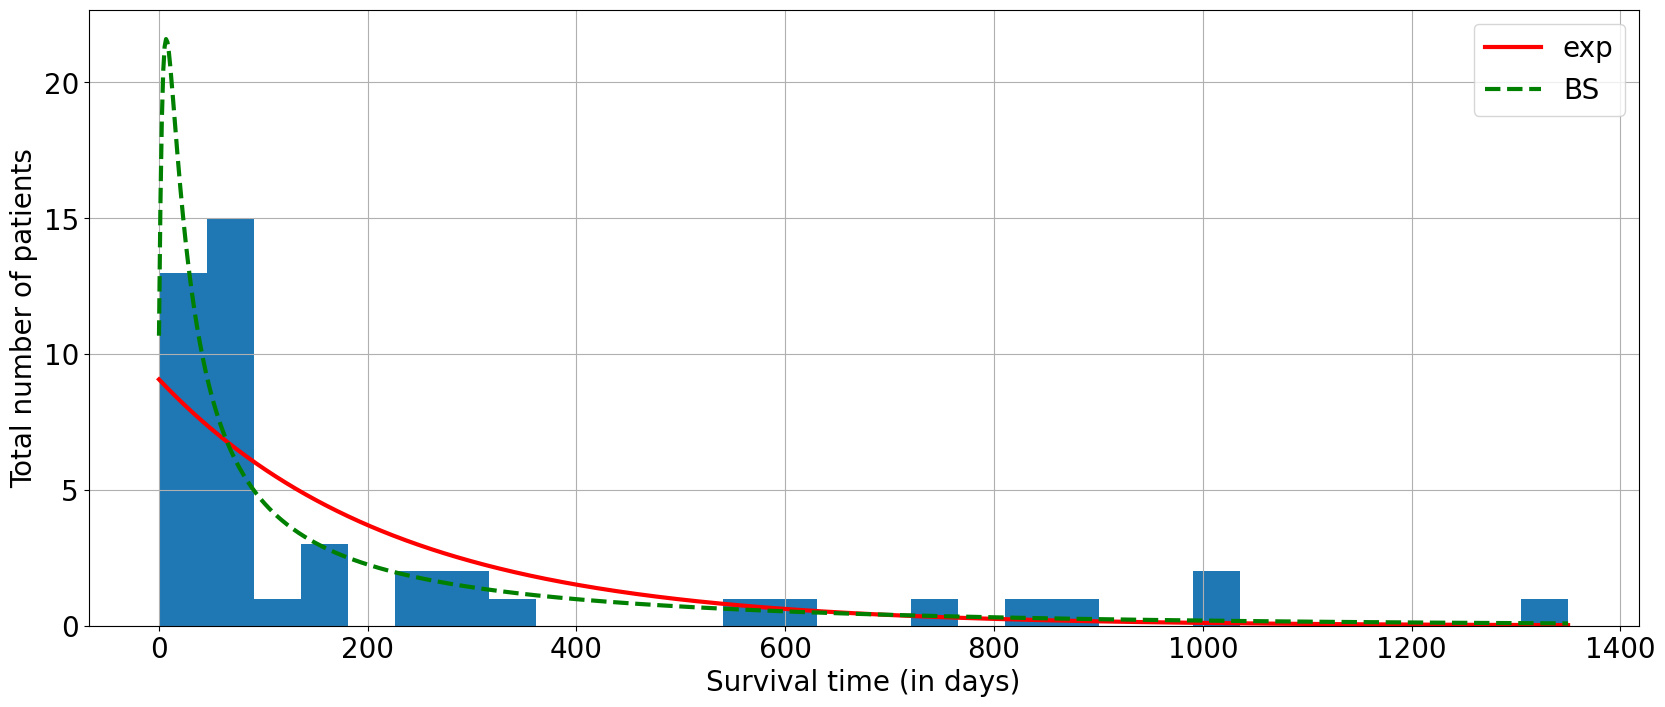

In [12]:
dist_fl = dist.pdf(days, *args)
nbins = 30
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
ax.hist(survival, nbins)
ax.plot(days, dist_exp * len(survival) * sample_max / nbins,
        '-r', lw=3, label='exp')
ax.plot(days, dist_fl * len(survival) * sample_max / nbins,
        '--g', lw=3, label='BS')
ax.set_xlabel("Survival time (in days)", fontsize = 20)
ax.set_ylabel("Total number of patients", fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
ax.legend(fontsize = 20)
ax.grid(True)

### Exercise : 
Generate $1000$ samples from a Gaussian density with mean $\mu = 5$ and standard deviation $\sigma = 2$, and store them in variable $X$.
Plot the histogram of the data sample. Using maximum likelihood method, find the estimates of population mean $\hat \mu_{MLE}$ and population standard deviation $\hat \sigma_{MLE}$ from the sample. Now plot the Gaussian density function with the estimated parameters and compare it with the density of your samples.
$$\large \mathcal{N}(\mu, \sigma) = \frac{1}{\sqrt{2\pi\sigma^{2}}}e^{-\frac{{(x - \mu)^{2}}}{2\sigma^2}}$$

Text(0, 0.5, 'Count')

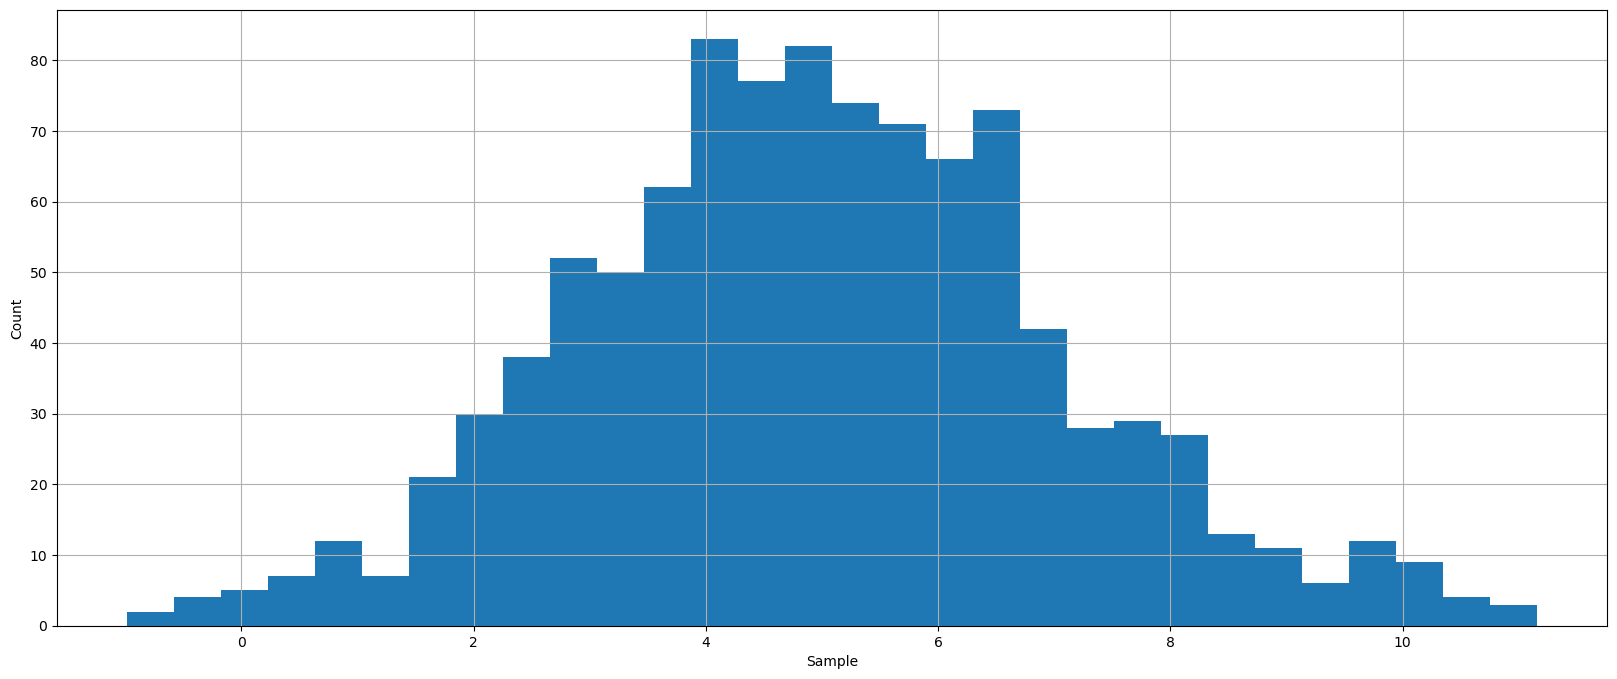

In [13]:
# Your code solution here
X = np.random.normal(loc=5, scale=2, size=1000)

fig, ax = plt.subplots(1, 1, figsize=(20, 8))
ax.grid(True)
ax.hist(X, bins=30)
ax.set_xlabel('Sample')
ax.set_ylabel('Count')

In [14]:
sample_mean = X.mean()
sample_deviation = X.std()
print("Sample Mean =", sample_mean, "and Sample Standard Deviation =", sample_deviation)

Sample Mean = 4.985332001533048 and Sample Standard Deviation = 2.0791976461789345


In [15]:
sample_max = X.max()
days = np.linspace(X.min(), X.max(), 1000)

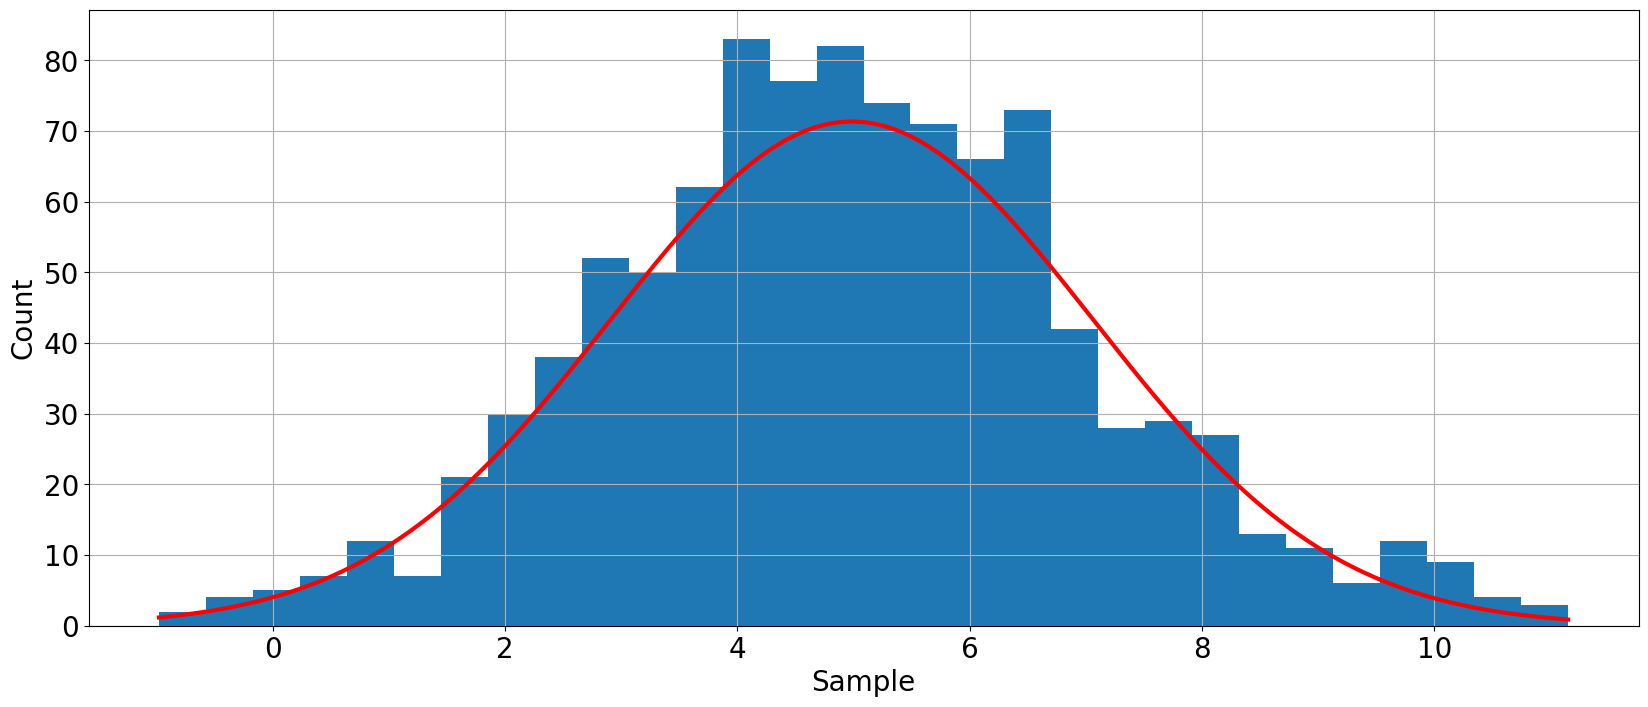

In [16]:
dist_norm = st.norm.pdf(days, loc=sample_mean, scale=sample_deviation)
nbins = 30
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
ax.grid(True)
ax.hist(X, nbins)
ax.plot(days, dist_norm * len(X) * sample_max / nbins, '-r', lw=3)
ax.set_xlabel("Sample", fontsize = 20)
ax.set_ylabel("Count", fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()